# SGD를 사용하여 2차 함수 모델 fiiting하기

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 데이터 생성하기

In [2]:
# function
f = lambda x: x**2 + 1.0/3.0 * x + 5.0

In [3]:
x_train = np.linspace(-20, 60, 50)
fx = f(x_train)

In [4]:
np.random.seed(313)
y_train = fx + 500 * np.random.rand(len(x_train))

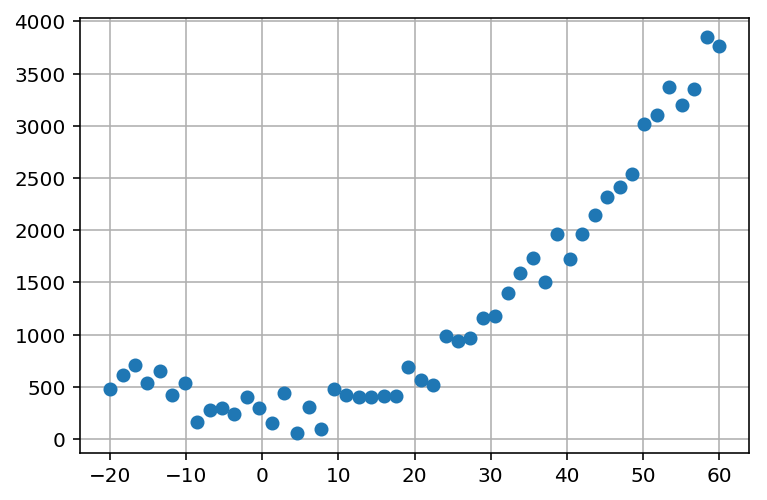

In [5]:
plt.plot(x_train,y_train, 'o')
plt.grid()
plt.show()

\begin{equation}
loss(w) = \sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

In [11]:
def loss(w, x_set, y_set):
    num_data = len(x_set)
    val = 0.0
    for i in range(num_data):
        val += 1.0 * (w[0] * x_set[i]**2 + w[1] * x_set[i] + w[2] - y_set[i])**2
    return val
# loss 는 현재 weight 에서 실제 x_train, y_train 넣어서 구한 cost

In [12]:
loss(np.array([1.0, 1.0, 1.0]), x_train, y_train)

3961622.7156127933

## 1. Gradient Descent 사용하기
1. Define gradient
1. Tune Parameters

\begin{equation}
loss(w) = \sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

\begin{equation}
\nabla loss(w) =
2\sum_{i=1}^N
(w_0 x_i^2 + w_1x_i + w_2 - y_i)
\begin{bmatrix}
x_i^2\\
x_i\\
1
\end{bmatrix}
\end{equation}

- w 에 대해 미분하면 gradient vector (3 dim)

In [6]:
def grad_loss(w, x_set, y_set):
    num_data = len(x_set)
    val = np.zeros(len(w))
    for i in range(num_data):
        er = w[0] * x_set[i]**2 + w[1] * x_set[i] + w[2] - y_set[i]
        val += 2.0 * er * np.array([x_set[i]**2, x_set[i], 1.0])
    return val
# val : 3dim 의 gradient vector

In [9]:
grad_loss(np.array([1.0, 1.0, 1.0]), x_train, y_train)

array([-22947510.00901192,   -454602.62405196,    -24713.01999432])

In [13]:
def steepest_descent_3d(loss, grad_func, w0, x_set, y_set, learning_rate=0.01, MaxIter=10):
    for i in range(MaxIter):
        w1 = w0 -learning_rate * grad_func(w0, x_set, y_set)
        w0 = w1
    return w0

In [14]:
w0 = np.array([1.0, 1.0, 1.0])
w_gd = steepest_descent_3d(loss, grad_loss, w0, x_train, y_train, \
                           learning_rate=2E-9, MaxIter=1000)
print(w_gd)

[1.1124073  0.98533224 1.02805965]


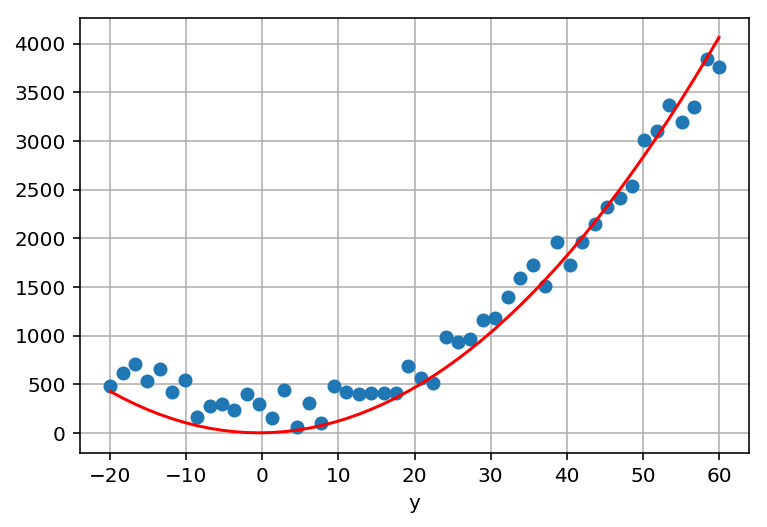

In [15]:
y_pred = w_gd[0] * x_train ** 2 + w_gd[1] * x_train + w_gd[2]
plt.plot(x_train,y_train, 'o')
plt.plot(x_train,y_pred, 'r-')
plt.grid()
plt.xlabel('x')
plt.xlabel('y')
plt.show()

## 2. Normalization 하기
1. min/max normalization
```python
scaled_x = (x - np.min(x)) / (np.max(x) - np.min(x))
```
1. mean/variance normailzation
```python
scaled_x = (x - np.mean(x)) / np.sqrt(np.var(x))
```

### 2-1. min/max normalization
```python
scaled_x = (x - np.min(x)) / (np.max(x) - np.min(x))
```

- x 의 scale 은 0 ~ 1 사이로 변하지만
- y 의 scale 은 0 ~ 4000 사이 그래로 유지됨 ( w 의 scale 이 그만큼 확대가 되는 것임)

In [11]:
scaled_x_train1 = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
print(x_train)
print(scaled_x_train1)

[-20.         -18.36734694 -16.73469388 -15.10204082 -13.46938776
 -11.83673469 -10.20408163  -8.57142857  -6.93877551  -5.30612245
  -3.67346939  -2.04081633  -0.40816327   1.2244898    2.85714286
   4.48979592   6.12244898   7.75510204   9.3877551   11.02040816
  12.65306122  14.28571429  15.91836735  17.55102041  19.18367347
  20.81632653  22.44897959  24.08163265  25.71428571  27.34693878
  28.97959184  30.6122449   32.24489796  33.87755102  35.51020408
  37.14285714  38.7755102   40.40816327  42.04081633  43.67346939
  45.30612245  46.93877551  48.57142857  50.20408163  51.83673469
  53.46938776  55.10204082  56.73469388  58.36734694  60.        ]
[ 0.          0.02040816  0.04081633  0.06122449  0.08163265  0.10204082
  0.12244898  0.14285714  0.16326531  0.18367347  0.20408163  0.2244898
  0.24489796  0.26530612  0.28571429  0.30612245  0.32653061  0.34693878
  0.36734694  0.3877551   0.40816327  0.42857143  0.44897959  0.46938776
  0.48979592  0.51020408  0.53061224  0.55102041

In [12]:
w0 = np.array([1.0, 1.0, 1.0])
w_gd_sc1 = steepest_descent_3d(loss, grad_loss, w0, scaled_x_train1, y_train, \
                           learning_rate=.01, MaxIter=500)
print(w_gd_sc1)

[ 5501.65525174 -2235.65466477   487.85571158]


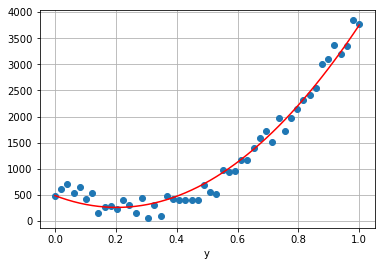

In [13]:
y_pred = w_gd_sc1[0] * scaled_x_train1 ** 2 + w_gd_sc1[1] * scaled_x_train1 + w_gd_sc1[2]
plt.plot(scaled_x_train1, y_train, 'o')
plt.plot(scaled_x_train1, y_pred, 'r-')
plt.grid()
plt.xlabel('scaled x')
plt.xlabel('y')
plt.show()

### 2-2. mean/variance normalization
```python
scaled_x = (x - np.mean(x)) / np.sqrt(np.var(x))
```

In [14]:
scaled_x_train2 = (x_train - np.mean(x_train)) / np.sqrt(np.var(x_train))
print(x_train)
print(scaled_x_train2)

[-20.         -18.36734694 -16.73469388 -15.10204082 -13.46938776
 -11.83673469 -10.20408163  -8.57142857  -6.93877551  -5.30612245
  -3.67346939  -2.04081633  -0.40816327   1.2244898    2.85714286
   4.48979592   6.12244898   7.75510204   9.3877551   11.02040816
  12.65306122  14.28571429  15.91836735  17.55102041  19.18367347
  20.81632653  22.44897959  24.08163265  25.71428571  27.34693878
  28.97959184  30.6122449   32.24489796  33.87755102  35.51020408
  37.14285714  38.7755102   40.40816327  42.04081633  43.67346939
  45.30612245  46.93877551  48.57142857  50.20408163  51.83673469
  53.46938776  55.10204082  56.73469388  58.36734694  60.        ]
[-1.69774938 -1.62845348 -1.55915759 -1.4898617  -1.4205658  -1.35126991
 -1.28197402 -1.21267813 -1.14338223 -1.07408634 -1.00479045 -0.93549455
 -0.86619866 -0.79690277 -0.72760688 -0.65831098 -0.58901509 -0.5197192
 -0.4504233  -0.38112741 -0.31183152 -0.24253563 -0.17323973 -0.10394384
 -0.03464795  0.03464795  0.10394384  0.17323973

In [15]:
w0 = np.array([1.0, 1.0, 1.0])
w_gd_sc2 = steepest_descent_3d(loss, grad_loss, w0, scaled_x_train2, y_train, \
                           learning_rate=.005, MaxIter=500)
print(w_gd_sc2)

[ 576.07754104  949.15250554  647.15469972]


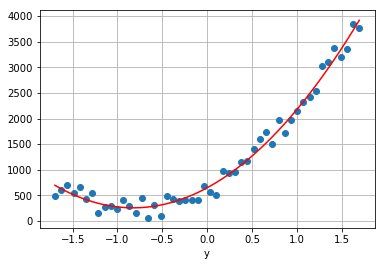

In [16]:
y_pred = w_gd_sc2[0] * scaled_x_train2 ** 2 + w_gd_sc2[1] * scaled_x_train2 + w_gd_sc2[2]
plt.plot(scaled_x_train2, y_train, 'o')
plt.plot(scaled_x_train2, y_pred, 'r-')
plt.grid()
plt.xlabel('scaled x')
plt.xlabel('y')
plt.show()

## 3. Stochastic Gradient Descent
1. `np.random.shuffle()`을 사용하여 `x_train`을 섞는다.
1. `generate_batches()`를 사용하여 batch들을 만든다.
1. Stochastic Gradient Method를 적용한다.

In [17]:
def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    out_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        out_batches.append(batch)

    return out_batches

### 3-1. Shuffle하기
```python
np.random.shuffle(x)
```

In [18]:
a = np.arange(len(x_train))
print(a)
print(x_train[a])
np.random.shuffle(a)
print(a)
print(x_train[a])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[-20.         -18.36734694 -16.73469388 -15.10204082 -13.46938776
 -11.83673469 -10.20408163  -8.57142857  -6.93877551  -5.30612245
  -3.67346939  -2.04081633  -0.40816327   1.2244898    2.85714286
   4.48979592   6.12244898   7.75510204   9.3877551   11.02040816
  12.65306122  14.28571429  15.91836735  17.55102041  19.18367347
  20.81632653  22.44897959  24.08163265  25.71428571  27.34693878
  28.97959184  30.6122449   32.24489796  33.87755102  35.51020408
  37.14285714  38.7755102   40.40816327  42.04081633  43.67346939
  45.30612245  46.93877551  48.57142857  50.20408163  51.83673469
  53.46938776  55.10204082  56.73469388  58.36734694  60.        ]
[17 10  5 29 27  0 32  8 46 38 20 41 37  9 49 21 25 35 34 19  4 24 12 11 42
 45  6  7 15  3 40 16 36 28 31 43 47 18 14 33  2 39 13  1 22 26 30 23 44 48]
[  7.75510204  -3.67346939 -11.83

### 3-2. Batch 만들기

In [19]:
batch_size = 5
for x_train_batch, y_train_batch in generate_batches(batch_size, scaled_x_train1, y_train):
    print('x_batch = {0}'.format(x_train_batch))
    print('y_batch = {0}'.format(y_train_batch))
    print('')

x_batch = [ 0.          0.02040816  0.04081633  0.06122449  0.08163265]
y_batch = [ 481.10314548  611.2891676   709.90764894  537.00448518  655.05780414]

x_batch = [ 0.10204082  0.12244898  0.14285714  0.16326531  0.18367347]
y_batch = [ 421.59169575  540.51566433  161.81248215  276.9421948   294.45256146]

x_batch = [ 0.20408163  0.2244898   0.24489796  0.26530612  0.28571429]
y_batch = [ 235.43696233  399.97421473  301.08464518  156.63488549  439.82118841]

x_batch = [ 0.30612245  0.32653061  0.34693878  0.36734694  0.3877551 ]
y_batch = [  59.42747351  308.98510285   97.82762048  477.71653767  424.47416833]

x_batch = [ 0.40816327  0.42857143  0.44897959  0.46938776  0.48979592]
y_batch = [ 398.30005758  406.18799578  410.6246957   408.81124324  688.07331907]

x_batch = [ 0.51020408  0.53061224  0.55102041  0.57142857  0.59183673]
y_batch = [ 564.99626231  516.54502664  984.04405243  937.61761092  964.371476  ]

x_batch = [ 0.6122449   0.63265306  0.65306122  0.67346939  0.69387755

### 3-3. Stochastic Gradient Descent 적용
1. min/max normalization을 적용
1. `np.random.shuffle()` 이용하여 데이터 골고루 섞기
1. 다음과 같이 Parameter를 설정
    1. `batch_size=10`
    1. `learning_rate=0.01`
    1. `w0=np.array([1.0, 1.0, 1.0])`
    1. `MaxEpochs = 1000`
1. 아래 for loop 안에 SGD를 구현하시면 됩니다.
    ```python
    for epoch in range(MaxEpochs):
        for x_batch, y_batch in generate_batches(_, _, _):
            grad = grad_loss(w0, x_batch, y_batch)
            # do gradient descent with x_batch and y_batch
    ```
1. SGD 구현을 올바르게하고, 위의 parameter로 설정하셨다면, 다음과 비슷한 그림이 나와야합니다.
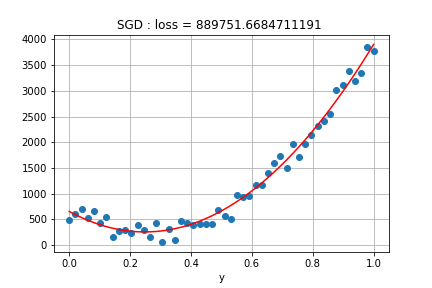

In [27]:
# TODO 1
scaled_x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))

In [ ]:
# TODO 2
idx = np.arange(0, len(scaled_x_train))
np.random.shuffle(idx)
suffled_scaled_x_train = scaled_x_train[idx] # shuffle the scaled x_train
suffled_y_train = y_train[idx] # shuffle the y_train

In [22]:
# TODO 3
batch_size = 10
MaxEpochs = 1000
learning_rate = 0.01
w0 = np.array([1.0, 1.0, 1.0])
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, suffled_scaled_x_train, suffled_y_train):
        # TODO 4
        grad = grad_loss(w0, x_batch, y_batch)
        w1 = w0 - learning_rate * grad
        w0 = w1 # update
        
w_sgd = w0

In [36]:
w_sgd

array([ 6366.6294529 , -3134.95562791,   640.38104271])

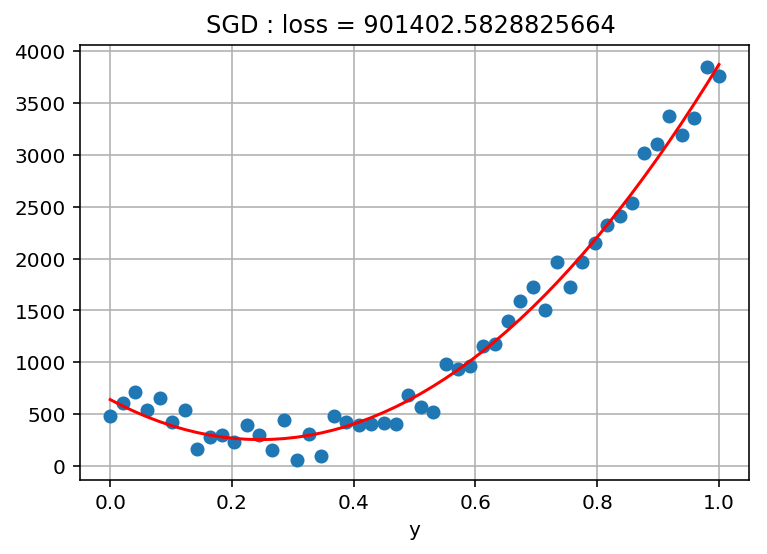

In [35]:
# TODO 5
y_pred = w_sgd[0] * scaled_x_train ** 2 + w_sgd[1] * scaled_x_train + w_sgd[2]
plt.plot(scaled_x_train, y_train, 'o')
plt.plot(scaled_x_train, y_pred, 'r-')
plt.grid()
plt.xlabel('scaled x')
plt.xlabel('y')
plt.title('SGD : loss = {0} '.format(loss(w_sgd, scaled_x_train, y_train)))
plt.show()